##CIFAR 10

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.utils import np_utils
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from random import randint

In [10]:
def plothist(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [2]:
batch_size = 128
# input image dimensions
img_size = 32
num_classes = 10
epochs = 12

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_val, y_val = x_train[40000:50000,:], y_train[40000:50000]
x_train, y_train = x_train[:40000,:], y_train[:40000]
print(x_train.shape)
print(x_val.shape)

170500096/170498071 [==============================] - 2s 0us/step
(40000, 32, 32, 3)
(10000, 32, 32, 3)


((32, 32, 3), array([3], dtype=uint8))

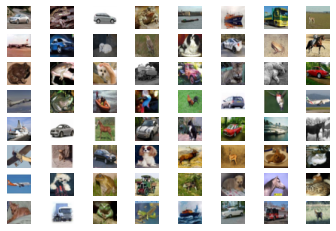

In [3]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train[randint(0, x_train.shape[0])], cmap='Greys')
x_train[0].shape, y_test[0]

In [4]:
x_train = x_train.reshape(x_train.shape[0], img_size, img_size, 3)
x_val = x_val.reshape(x_val.shape[0], img_size, img_size, 3)
x_test = x_test.reshape(x_test.shape[0], img_size, img_size, 3)

x_train = x_train/255.
x_test = x_test/255.
x_val = x_val/255.
print(x_train.shape)


print(x_train.shape[0], y_train.shape, 'train samples')
print(x_test.shape[0], 'test samples')

(40000, 32, 32, 3)
40000 (40000, 1) train samples
10000 test samples


In [5]:
# 4. One hot encoding label (Y)
y_train = np_utils.to_categorical(y_train, 10)
y_val = np_utils.to_categorical(y_val, 10)
y_test = np_utils.to_categorical(y_test, 10)
print('Initial data ', y_train[0])
print('Data after one-hot encoding ',y_train[0])

Initial data  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Data after one-hot encoding  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
model = Sequential()

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(img_size, img_size, 3)))

model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)       

In [7]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

checkpoint = ModelCheckpoint(
    "cifar_10.h5", 
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=False, 
    mode='auto', 
    save_req=1
)

early = EarlyStopping(
    monitor='val_accuracy', 
    min_delta=0, 
    patience=20, 
    verbose=1, 
    mode='auto'
)


In [8]:
# Fit data to model
H = model.fit(
              x_train, y_train, 
              validation_data=(x_test, y_test),
              callbacks = [early, checkpoint],
              batch_size=32, 
              epochs=30, 
              verbose=1
              )

Epoch 1/30
1250/1250 [==============================] - 42s 7ms/step - loss: 2.1873 - accuracy: 0.3798 - val_loss: 1.1576 - val_accuracy: 0.6231

Epoch 00001: val_accuracy improved from -inf to 0.62310, saving model to cifar_10.h5
Epoch 2/30
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1886 - accuracy: 0.6166 - val_loss: 0.9912 - val_accuracy: 0.6840

Epoch 00002: val_accuracy improved from 0.62310 to 0.68400, saving model to cifar_10.h5
Epoch 3/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.9908 - accuracy: 0.6840 - val_loss: 0.9609 - val_accuracy: 0.6962

Epoch 00003: val_accuracy improved from 0.68400 to 0.69620, saving model to cifar_10.h5
Epoch 4/30
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8520 - accuracy: 0.7283 - val_loss: 0.8262 - val_accuracy: 0.7395

Epoch 00004: val_accuracy improved from 0.69620 to 0.73950, saving model to cifar_10.h5
Epoch 5/30
1250/1250 [==============================] - 8s 7ms/step - 

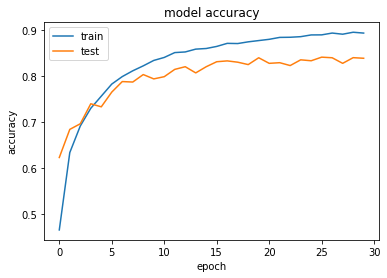

In [11]:
plothist(H)

In [12]:
score = model.evaluate(x_test, y_test)
print('accuracy: ',score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.7734 - accuracy: 0.8381
accuracy:  0.838100016117096
